In [1]:
import pandas as pd

players2 = pd.read_csv("data/0-1-IneriaRanks.csv")
players2 = players2.set_index(players2.columns[0])
pairs2 = pd.read_csv("data/0-1-PlayerPairs.csv")
pairs2.head()

_dictionary = pd.read_csv("data_dictionary.csv")
_data = pd.read_csv("Wimbledon_featured_matches.csv")

dictionary = _dictionary.copy()

In [2]:
data2 = _data.copy()
players2.head()

,Inertia
0,
Alexander Bublik,0.632432
Roman Safiullin,0.625641
Jannik Sinner,0.601458
Denis Shapovalov,0.600000
Carlos Alcaraz,0.594035


In [3]:
pairs2

,Unnamed: 0,player1,player2
0,0,Carlos Alcaraz,Nicolas Jarry
1,1,Alexander Zverev,Matteo Berrettini
2,2,Frances Tiafoe,Grigor Dimitrov
3,3,Alejandro Davidovich Fokina,Holger Rune
4,4,Daniil Medvedev,Marton Fucsovics
5,5,Jiri Lehecka,Tommy Paul
6,6,Christopher Eubanks,Christopher O'Connell
7,7,Laslo Djere,Stefanos Tsitsipas
8,8,Jannik Sinner,Quentin Halys
9,9,Daniel Elahi Galan,Mikael Ymer


In [4]:
inputs = {
    'p1': ['p1_win', "p1_distance_run",  'p1_game_win','p2_game_win', 'p1_score_diff', 'p1_unf_err', 'p2_unf_err', "p1_ser_sp", 'p1_ser'],
    'p2': ['p2_win', "p2_distance_run",  'p1_game_win','p2_game_win', 'p1_score_diff', 'p1_unf_err', 'p2_unf_err', "p2_ser_sp", 'p2_ser'],
    'gen':[]
}

In [5]:
import pandas as pd
import re
import numpy as np

from utils import database as db
from utils import train as tr
from utils import visualize as vs
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from utils import visualize as vs
sns.set_style("darkgrid")

# Ignore all warnings
warnings.filterwarnings("ignore")

/data1/yz812/mcm/utils/train.py:188: SyntaxWarning: "is" with a literal. Did you mean "=="?
  result = (self.result1 if pl is 1 else self.result2).sort_values(by=1, ascending=False)
/data1/yz812/mcm/utils/train.py:190: SyntaxWarning: "is" with a literal. Did you mean "=="?
  result = (self.result1 if pl is 1 else self.result2)


In [6]:
u1 = tr.ModelUnit("Carlos Alcaraz", "Nicolas Jarry", data2)

u1.preprocess()
u1.prefilter()
#u1.show_components()

u1.calc_torque(players2["Inertia"])
u1.train(inputs, 0.75)
#u.show_params()
u1.construct_momentum()
#u1.compare_indicator("speed_mph", "Serve Speed")
#u.compare_constructed()
#vs.save(f"flow/6-2-Iniicators")
u1.construct_energy()

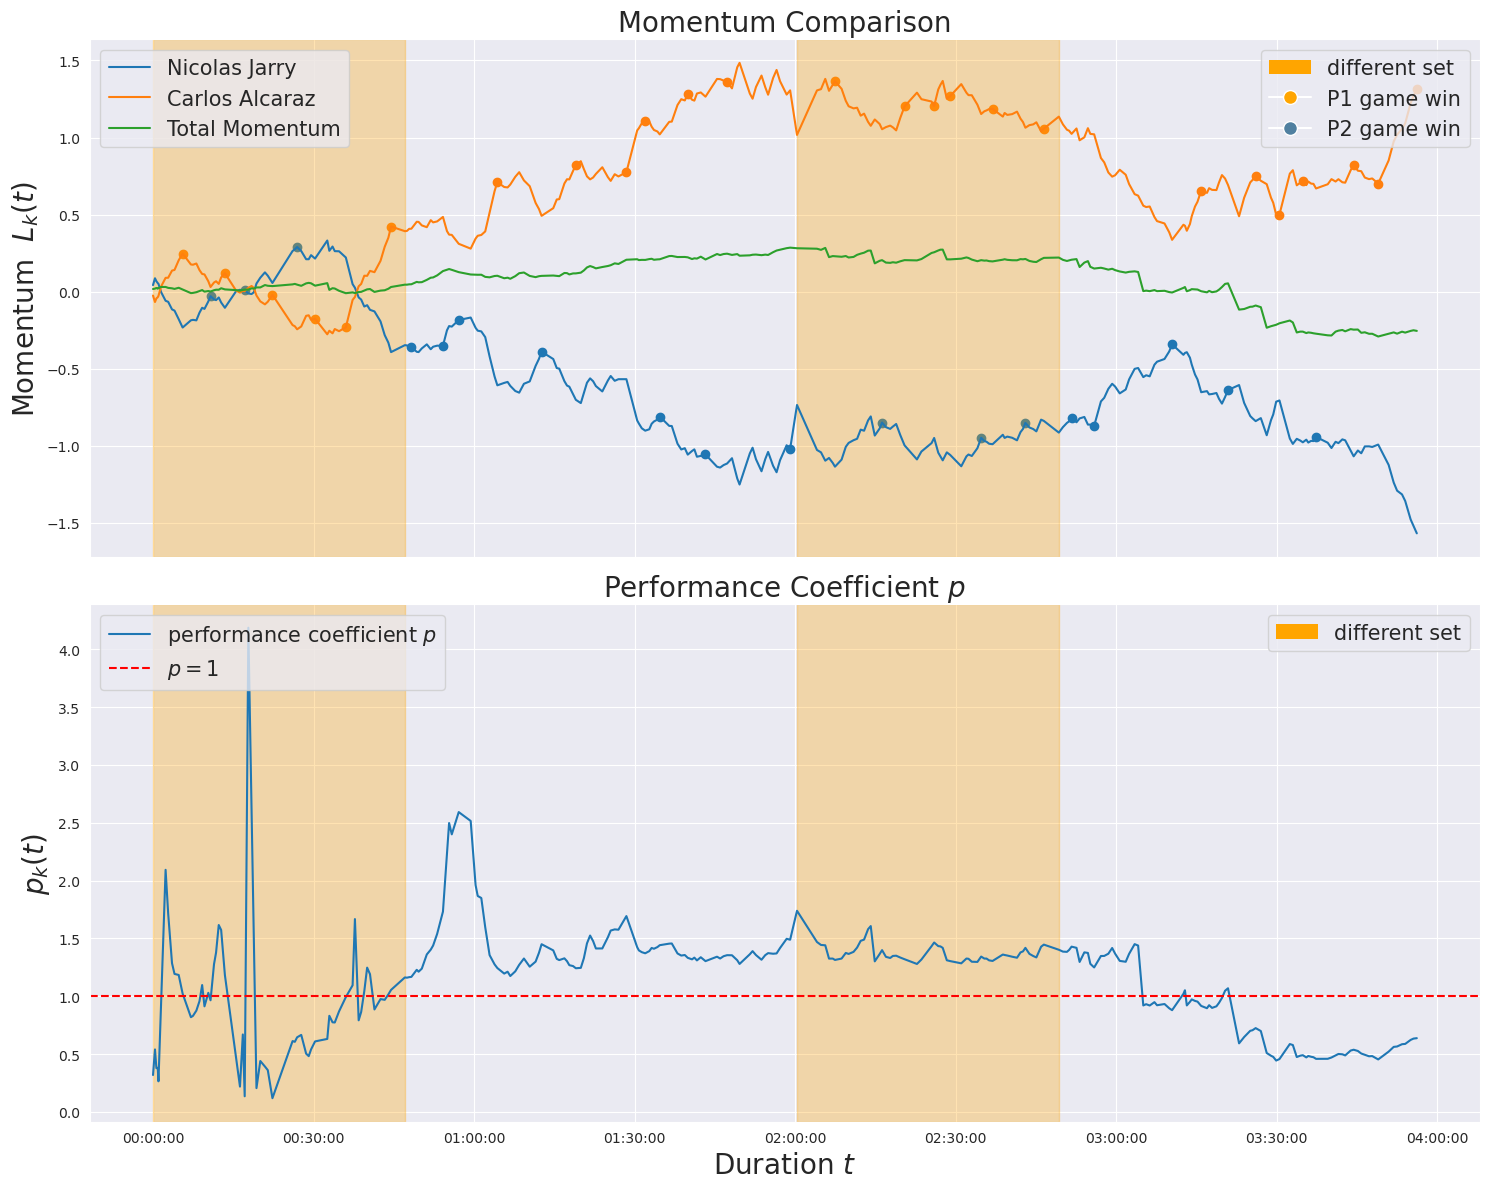

In [7]:
u1.summary()
plt.tight_layout()

In [8]:
u2 = tr.ModelUnit("Carlos Alcaraz", "Novak Djokovic", data2)

u2.preprocess()
u2.prefilter()
#u1.show_components()

u2.calc_torque(players2["Inertia"])
u2.train(inputs, 0.75)
x1,x2,_,_ = u2.predict()
#u.show_params()
u2.construct_momentum()
#u1.compare_indicator("speed_mph", "Serve Speed")
#u.compare_constructed()
#vs.save(f"flow/6-2-Iniicators")
u2.construct_energy()

In [9]:
mig1, mig2 = u1.predict_ex(x1, x1)

/home/yz812/anaconda3/lib/python3.11/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


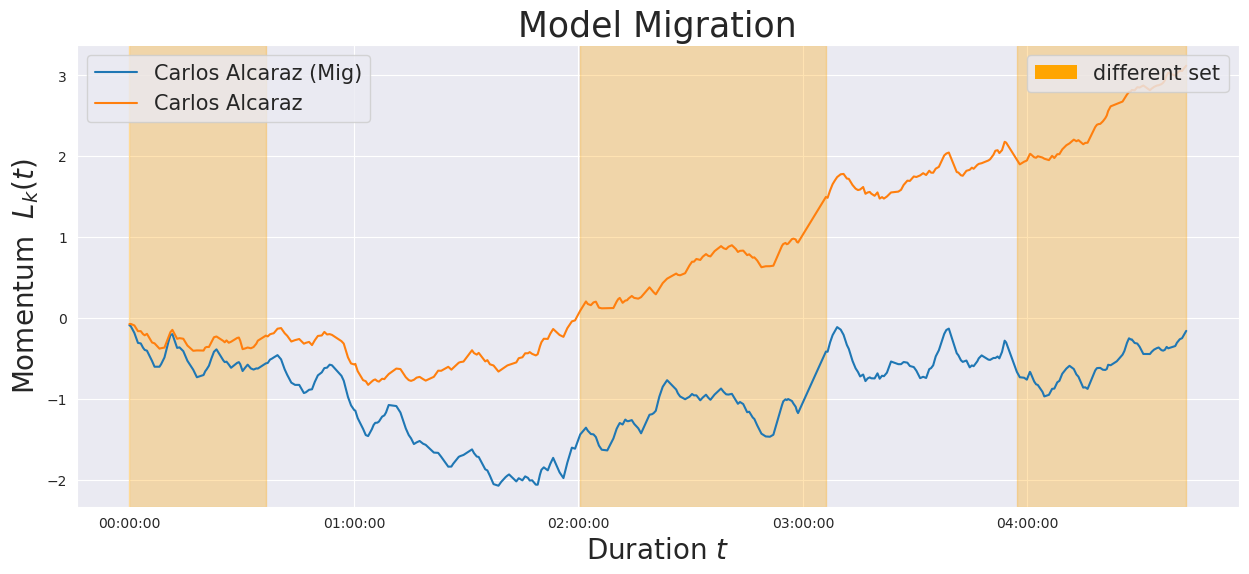

In [10]:
u2.compare_migrate(mig1)
vs.set_caption(True,False,True)
vs.save("7-1-Migration")

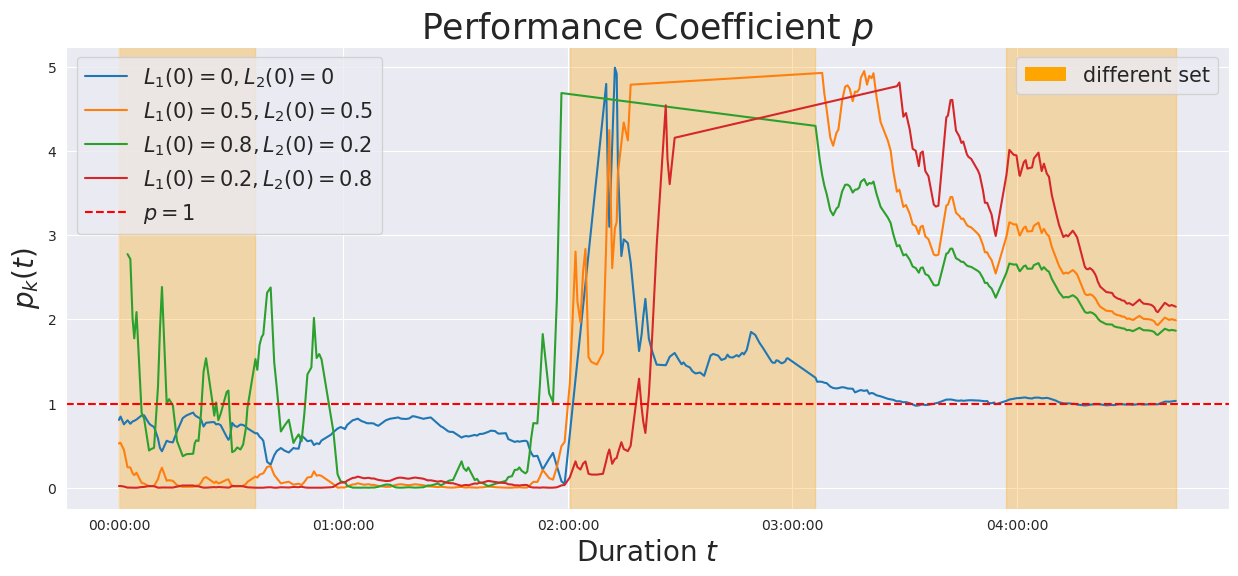

In [11]:
u2.construct_energy_stab()
u2.compare_performance_stab()
vs.save("7-1-SenseOfInit")

In [12]:
stab = [[0,0], [0.5,0.5], [1,0], [0,1]]
for idx, stb in enumerate(stab):
    print(stb[0], stb[1])

0 0
0.5 0.5
1 0
0 1
